# 토픽모델링-LDA

### 추출한 문서에 담긴 단어들의 주제(토픽)을 추출하는 '토픽모델링' 기법 중 하나인 LDA

토픽 모델링은 텍스트 데이터에서 사용된 주제어들의 동시 사용 패턴을 바탕으로, 해당 텍스트들을 대표하는 특정 주제나 이슈를 자동으로 추출하는 분석 기법으로 이때 토픽은 함께 등장할 확률이 높고 유사한 의미를 가지는 단어들의 집합이라고 할 수 있다.
-----> 텍스트 데이터 내 단어들의 빈도를 통계적으로 분석하여 전체 데이터를 관통하는 주제, 쟁점 분석 시 유용하다. 

### 1. 데이터 불러오기

In [1]:
import pandas as pd
df=pd.read_csv('삼성리뷰(부정).csv',encoding='utf-8')
df.head()

,content
0,주문하고 사전방문하고 제품배송까지 일주일도안걸린거같네요..빠른배송에<em>만족했고요...
1,구매전에 엄청 고민했어요..<em>돈을 좀 들이더라도 더 크고</em> 비싼걸 살것...
2,"싱크대 하부장 하나 빼고, 하난 폭을 3cm 줄여서 시공했어요 비규격장이라 9만원 ..."
3,한달 사용 후 가장 많이 들어본 질문 위주로 후기를 적어볼게요. <br>우선 소음 ...
4,저녁에 퇴근후 어린아이들 씻기고 재우기 바쁜데 설거지까지 하려니 매번 힘들었는데 주...


In [2]:
#데이터 전처리를 위한 리스트로 변환
data=df.values.tolist()
data[:5]

[['주문하고 사전방문하고 제품배송까지 일주일도안걸린거같네요..빠른배송에<em>만족했고요</em>. 제품받자마자 테스트하려고쌓아놓은설겆이를해봤는데 <em>세척은 정말잘되네요</em>...제가 손설겆이할때 박박문지르고 틈새까지하는편이라...그정도까지는아니지만 뽀드득거리고좋아요..배달짬뽕그릇을 혹시나하고돌려봤는데 아주말끔히<em>세척이되서</em>나와버려서...다시써야할정도더군요...이정도면 설겆이걱정없이 맡길수있을정도고요...다만 처음부터자동으로열리는기능이안되서 삼성서비스신청했는데....빠른시간안에 처리해주셔서...<em>그나마다행이라생각되네요</em>..수평이안맞아서 문짝이기우뚱거려안열린거였다는데...좀더써봐야할거같고요...자동문열림기능이좋긴한데...조금더열렸음하는바램이있네요....자동문열림기능이안되다보니...<em>꿉꿉한냄새도나고</em> 그릇들은세척은잘되었지만 물자국이남더라고요...추후에 자동문열림기능이 고장나거나 수평이틀어지면...이부분은 문제가될듯싶네여...그리고 저희집주방이 많이협소한데 크기가 딱! 알맞게나와서 빌트인은아니고 스텐딩으로해놨는데...<em>맞춤인것처럼 보기도좋고요</em> <em>작동소음도 그리 큰편은아닌것같아요</em>...타사6인용보다...조용한것같고요...돌려놓고 다른일하거나 잠을자도...거슬릴정도는아니더군요...<em>저렴한가격에 좋은제품구매하게되어 너무만족스럽네요</em>...고장없이 오래썼음하는바램입니다...'],
 ['구매전에 엄청 고민했어요..<em>돈을 좀 들이더라도 더 크고</em> 비싼걸 살것인가.. 그리고 세척은 잘될지..애벌 물헹굼은 그래도 해야하는데 소요되는 시간은 거기서 거기가 아닐까 했는데 <em>사길 잘한것 같네요</em>..저희는 초딩 둘이 있어서 자잘한 간식 식기류도 많이 나와서 자주 하게되니 너무 커도 부담일것 같고 세척은 제가 뜨거운물로 뽀득뽀득 씻어야 하는 성격인데 고온세척으로 마무리설정 하고 나면 윤이 날정도로 깨끗하네요..주위에서  세척후 자동열림 기능 있는걸로 꼭 사야한다고 하는데 이 기능도 

### 2. 정규표현식 & konlpy 사용해 명사 추출하기

In [3]:
#정규표현식 사용 한글 및 숫자만 추출
import re
regex=[]
for i in range(len(data)):
    text=re.sub('[^0-9ㄱ-힣]',' ',str(data[i]))
    text=re.sub(' +',' ',text)
    regex.append(text)

In [4]:
regex[:5]

[' 주문하고 사전방문하고 제품배송까지 일주일도안걸린거같네요 빠른배송에 만족했고요 제품받자마자 테스트하려고쌓아놓은설겆이를해봤는데 세척은 정말잘되네요 제가 손설겆이할때 박박문지르고 틈새까지하는편이라 그정도까지는아니지만 뽀드득거리고좋아요 배달짬뽕그릇을 혹시나하고돌려봤는데 아주말끔히 세척이되서 나와버려서 다시써야할정도더군요 이정도면 설겆이걱정없이 맡길수있을정도고요 다만 처음부터자동으로열리는기능이안되서 삼성서비스신청했는데 빠른시간안에 처리해주셔서 그나마다행이라생각되네요 수평이안맞아서 문짝이기우뚱거려안열린거였다는데 좀더써봐야할거같고요 자동문열림기능이좋긴한데 조금더열렸음하는바램이있네요 자동문열림기능이안되다보니 꿉꿉한냄새도나고 그릇들은세척은잘되었지만 물자국이남더라고요 추후에 자동문열림기능이 고장나거나 수평이틀어지면 이부분은 문제가될듯싶네여 그리고 저희집주방이 많이협소한데 크기가 딱 알맞게나와서 빌트인은아니고 스텐딩으로해놨는데 맞춤인것처럼 보기도좋고요 작동소음도 그리 큰편은아닌것같아요 타사6인용보다 조용한것같고요 돌려놓고 다른일하거나 잠을자도 거슬릴정도는아니더군요 저렴한가격에 좋은제품구매하게되어 너무만족스럽네요 고장없이 오래썼음하는바램입니다 ',
 ' 구매전에 엄청 고민했어요 돈을 좀 들이더라도 더 크고 비싼걸 살것인가 그리고 세척은 잘될지 애벌 물헹굼은 그래도 해야하는데 소요되는 시간은 거기서 거기가 아닐까 했는데 사길 잘한것 같네요 저희는 초딩 둘이 있어서 자잘한 간식 식기류도 많이 나와서 자주 하게되니 너무 커도 부담일것 같고 세척은 제가 뜨거운물로 뽀득뽀득 씻어야 하는 성격인데 고온세척으로 마무리설정 하고 나면 윤이 날정도로 깨끗하네요 주위에서 세척후 자동열림 기능 있는걸로 꼭 사야한다고 하는데 이 기능도 있어서 자동 환기되니 가성비도 괜찮은것 같아요 설치는 주방싱크대 서랍쪽 한면이 딱 들어맞는 크기여서 설치하루전 추가금없이 미리 들어갈 자리 작업 다 해주셨구요 담날 바로 설치로 구매후 몇일만에 친절하게 안내 및 빠른설치해주셨습니다 신랑이랑 퇴근후 저녁식사후 설겆이 

In [5]:
#형태소 분석기 Okt 불러오가
from konlpy.tag import Okt

okt=Okt()

In [6]:
#Okt를 이용해 명사추출

noun=[]
for i in range(len(regex)):
    noun.append(okt.nouns(regex[i]))
    print(str(i)+ "번째 수행중")

0번째 수행중
1번째 수행중
2번째 수행중
3번째 수행중
4번째 수행중
5번째 수행중
6번째 수행중
7번째 수행중
8번째 수행중
9번째 수행중
10번째 수행중
11번째 수행중
12번째 수행중
13번째 수행중
14번째 수행중
15번째 수행중
16번째 수행중
17번째 수행중
18번째 수행중
19번째 수행중
20번째 수행중
21번째 수행중
22번째 수행중
23번째 수행중
24번째 수행중
25번째 수행중
26번째 수행중
27번째 수행중
28번째 수행중
29번째 수행중
30번째 수행중
31번째 수행중
32번째 수행중
33번째 수행중
34번째 수행중
35번째 수행중
36번째 수행중
37번째 수행중
38번째 수행중
39번째 수행중
40번째 수행중
41번째 수행중
42번째 수행중
43번째 수행중
44번째 수행중
45번째 수행중
46번째 수행중
47번째 수행중
48번째 수행중
49번째 수행중
50번째 수행중
51번째 수행중
52번째 수행중
53번째 수행중
54번째 수행중
55번째 수행중
56번째 수행중
57번째 수행중
58번째 수행중
59번째 수행중
60번째 수행중
61번째 수행중
62번째 수행중
63번째 수행중
64번째 수행중
65번째 수행중
66번째 수행중
67번째 수행중
68번째 수행중
69번째 수행중
70번째 수행중
71번째 수행중
72번째 수행중
73번째 수행중
74번째 수행중
75번째 수행중
76번째 수행중
77번째 수행중
78번째 수행중
79번째 수행중
80번째 수행중
81번째 수행중
82번째 수행중
83번째 수행중
84번째 수행중
85번째 수행중
86번째 수행중
87번째 수행중
88번째 수행중
89번째 수행중
90번째 수행중
91번째 수행중
92번째 수행중
93번째 수행중
94번째 수행중
95번째 수행중
96번째 수행중
97번째 수행중
98번째 수행중
99번째 수행중
100번째 수행중
101번째 수행중
102번째 수행중
103번째 수행중
104번째 수행중
105번째 수행중
106번째 수행중
107번째 수행중
108번째 수행중
109번째 수행중
110번째 수행중


In [7]:
#wordcloud 할 때는 리스트 안에 리스트 구조 [[]] 이것을 하나의 리스트로 만들어 주었음
#하지만 LDA의 받는 인자는 [[a,b,c],[d,e,f]]로 구성 -> 문서별로 단어를 구분하기 위해

#nouns=sum(noun,[])
#nouns[:5]

noun[:2]

[['주문',
  '방문',
  '제품',
  '배송',
  '일주일',
  '도안',
  '배송',
  '제품',
  '테스트',
  '설겆',
  '세척',
  '정말',
  '제',
  '손설겆이할때',
  '틈새',
  '편이',
  '정도',
  '뽀드득',
  '거리',
  '배달',
  '짬뽕',
  '그릇',
  '혹',
  '시나',
  '아주',
  '세척',
  '다시',
  '정도',
  '정도',
  '설겆',
  '걱정',
  '정도',
  '고요',
  '다만',
  '처음',
  '자동',
  '기능',
  '서비스',
  '신청',
  '처리',
  '다행',
  '생각',
  '수평',
  '이안',
  '문짝',
  '거려안',
  '좀더',
  '자동',
  '림',
  '기능',
  '데',
  '조금',
  '더',
  '바램',
  '자동',
  '림',
  '기능',
  '냄새',
  '도나',
  '그릇',
  '세척',
  '물',
  '자국',
  '추후',
  '자동',
  '림',
  '기능',
  '고장',
  '거나',
  '평이',
  '부분',
  '문제',
  '집',
  '주방',
  '협',
  '데',
  '크기',
  '빌트',
  '스텐딩',
  '보기',
  '소음',
  '편',
  '인용',
  '다른',
  '잠',
  '자도',
  '정도',
  '가격',
  '제품',
  '구매',
  '고장',
  '바램'],
 ['전',
  '고민',
  '돈',
  '좀',
  '더',
  '걸',
  '세척',
  '애벌',
  '물헹굼',
  '소요',
  '시간',
  '거기',
  '거기',
  '저희',
  '초딩',
  '둘',
  '간식',
  '식',
  '기류',
  '자주',
  '부담',
  '세척',
  '제',
  '물',
  '성격',
  '세척',
  '마무리',
  '설정',
  '윤',
  '날',
  '정도',
  '주위',
  '척후',
  '자동',
  '

### 3. LDA 사전 제작

In [8]:
# LDA가 들어있는 gensim 모델 불러오기

import gensim


In [9]:
#사전 만들기(딕셔너리형태!필수)

id2word=gensim.corpora.Dictionary(noun)

In [10]:
#noun 복사하기(이름 texts로!)
texts=noun.copy()

corpus=[id2word.doc2bow(text) for text in texts]

#확인
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 2), (9, 4), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 3), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 3), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 4), (48, 1), (49, 5), (50, 1), (51, 1), (52, 3), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1)]]


### 4. Coherence를 통해 토픽 최적화하기

In [11]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

coherence_values=[]
for i in range(2,15):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus,num_topics=i,id2word=id2word)
    coherence_model_lda=CoherenceModel(model=ldamodel,texts=noun,dictionary=id2word,topn=10)
    coherence_lda=coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

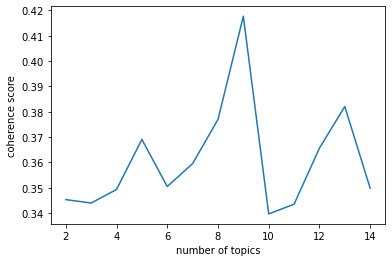

In [12]:
x=range(2,15)
plt.plot(x,coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

### 5. LDA 모델 구축 & 시각화

In [13]:
#가장 먼저 topic의 개수를 몇 개로 할 것인지 지정 

number=7

In [14]:
#지금까지 만든 데이터들을 통해 LDA 모델 구축

ldamodel=gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=number,
    alpha=0.1
)

In [15]:
ldamodel.print_topics(num_words=20)

[(0,
  '0.032*"설치" + 0.013*"식기세척기" + 0.013*"세척" + 0.012*"기사" + 0.011*"제품" + 0.010*"구매" + 0.010*"인용" + 0.010*"삼성" + 0.009*"싱크대" + 0.009*"사용" + 0.008*"것" + 0.008*"그릇" + 0.008*"정말" + 0.007*"설거지" + 0.006*"분" + 0.006*"리폼" + 0.006*"시간" + 0.006*"주문" + 0.005*"기존" + 0.005*"식"'),
 (1,
  '0.037*"설치" + 0.017*"싱크대" + 0.014*"기사" + 0.012*"식기세척기" + 0.011*"후" + 0.010*"주문" + 0.010*"사용" + 0.008*"구매" + 0.008*"세척" + 0.008*"세기" + 0.007*"식" + 0.007*"제품" + 0.007*"고민" + 0.007*"시간" + 0.007*"인용" + 0.007*"설거지" + 0.006*"때" + 0.006*"빌트" + 0.006*"더" + 0.006*"공사"'),
 (2,
  '0.022*"설치" + 0.012*"설거지" + 0.012*"식기세척기" + 0.012*"인용" + 0.010*"싱크대" + 0.008*"시간" + 0.008*"집" + 0.008*"식" + 0.007*"세척" + 0.007*"고민" + 0.006*"설겆" + 0.006*"때" + 0.006*"기사" + 0.006*"세기" + 0.006*"생각" + 0.006*"더" + 0.006*"기능" + 0.006*"이제" + 0.006*"저" + 0.006*"삼성"'),
 (3,
  '0.030*"설치" + 0.013*"식기세척기" + 0.010*"제품" + 0.009*"기사" + 0.009*"정말" + 0.009*"싱크대" + 0.008*"세척" + 0.008*"설거지" + 0.007*"식" + 0.007*"세기" + 0.006*"디자인" + 0.006*"기능" + 0.006*"주방" + 0.006*"삼

In [16]:
ldamodel.show_topics(formatted=False)

[(0,
  [('설치', 0.031581763),
   ('식기세척기', 0.013292072),
   ('세척', 0.012559315),
   ('기사', 0.011704691),
   ('제품', 0.011489364),
   ('구매', 0.009902003),
   ('인용', 0.009815838),
   ('삼성', 0.009667576),
   ('싱크대', 0.009179289),
   ('사용', 0.008754283)]),
 (1,
  [('설치', 0.036845576),
   ('싱크대', 0.01674831),
   ('기사', 0.01424858),
   ('식기세척기', 0.012218033),
   ('후', 0.010833911),
   ('주문', 0.010241169),
   ('사용', 0.010028532),
   ('구매', 0.0083065275),
   ('세척', 0.007968907),
   ('세기', 0.007531132)]),
 (2,
  [('설치', 0.021773342),
   ('설거지', 0.012282353),
   ('식기세척기', 0.011912321),
   ('인용', 0.0115828775),
   ('싱크대', 0.009808613),
   ('시간', 0.008338575),
   ('집', 0.00813346),
   ('식', 0.007571697),
   ('세척', 0.0070508216),
   ('고민', 0.0066811)]),
 (3,
  [('설치', 0.030412259),
   ('식기세척기', 0.012909021),
   ('제품', 0.009569927),
   ('기사', 0.009378463),
   ('정말', 0.009001857),
   ('싱크대', 0.008584418),
   ('세척', 0.008274376),
   ('설거지', 0.007935552),
   ('식', 0.0070280894),
   ('세기', 0.0067261136)])

In [17]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vls=pyLDAvis.gensim.prepare(ldamodel,corpus,id2word)
vls

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.007734  0.022615       1        1  27.520944
0      0.005283  0.002762       2        1  20.974284
4     -0.012042  0.006866       3        1  20.847940
6     -0.049243  0.001723       4        1  14.971740
2      0.015982  0.010245       5        1   8.143283
3      0.042618  0.010435       6        1   3.797034
5      0.005135 -0.054646       7        1   3.744776, topic_info=      Term        Freq       Total Category  logprob  loglift
95      설치  825.000000  825.000000  Default  30.0000  30.0000
43      인용  260.000000  260.000000  Default  29.0000  29.0000
34      세척  348.000000  348.000000  Default  28.0000  28.0000
143  식기세척기  344.000000  344.000000  Default  27.0000  27.0000
101    싱크대  314.000000  314.000000  Default  26.0000  26.0000
..     ...         ...         ...      ...      ...      ...
74       것    4.142478  190.784782   Topic7  -5.5334  -0.5450
55      주문    4.011473  169.799721   Topic7  -5.5655  -0.4607
190     사용    4.310904  297.385954   Topic7  -5.4935  -0.9491
349      수    3.761814  116.060019   Topic7  -5.6298  -0.1444
50      정말    3.790663  141.294844   Topic7  -5.6221  -0.3335

[562 rows x 6 columns], token_table=      Topic      Freq Term
term                      
2118      1  0.173321   가게
2118      2  0.173321   가게
2118      5  0.519964   가게
0         1  0.280129   가격
0         2  0.199039   가격
...     ...       ...  ...
237       6  0.037787   후기
237       7  0.018893   후기
1555      1  0.420525   흥건
1555      7  0.420525   흥건
1632      3  0.882509   히든

[1241 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 5, 7, 3, 4, 6])

In [18]:
#html 파일을 output으로 내서 저장할 수 있음
#pyLDAvis.save_html(vls,'삼성리뷰(부정).html')

C:\Users\HSB\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 6. 한 글자 명사 지우기(추가 전처리)

In [19]:
filter_noun=noun.copy()

C:\Users\HSB\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
#한 글자 삭제
stopwords={'식기세척기','식세기'}
for index,word in enumerate(filter_noun):
    for i,w in enumerate(word):
        if len(w)<2 or w in stopwords :
            filter_noun[index].pop(i)

C:\Users\HSB\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
filter_noun[:5]

C:\Users\HSB\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['주문',
  '방문',
  '제품',
  '배송',
  '일주일',
  '도안',
  '배송',
  '제품',
  '테스트',
  '설겆',
  '세척',
  '정말',
  '손설겆이할때',
  '틈새',
  '편이',
  '정도',
  '뽀드득',
  '거리',
  '배달',
  '짬뽕',
  '그릇',
  '시나',
  '아주',
  '세척',
  '다시',
  '정도',
  '정도',
  '설겆',
  '걱정',
  '정도',
  '고요',
  '다만',
  '처음',
  '자동',
  '기능',
  '서비스',
  '신청',
  '처리',
  '다행',
  '생각',
  '수평',
  '이안',
  '문짝',
  '거려안',
  '좀더',
  '자동',
  '기능',
  '조금',
  '바램',
  '자동',
  '기능',
  '냄새',
  '도나',
  '그릇',
  '세척',
  '자국',
  '추후',
  '자동',
  '기능',
  '고장',
  '거나',
  '평이',
  '부분',
  '문제',
  '주방',
  '데',
  '크기',
  '빌트',
  '스텐딩',
  '보기',
  '소음',
  '인용',
  '다른',
  '자도',
  '정도',
  '가격',
  '제품',
  '구매',
  '고장',
  '바램'],
 ['고민',
  '좀',
  '걸',
  '세척',
  '애벌',
  '물헹굼',
  '소요',
  '시간',
  '거기',
  '거기',
  '저희',
  '초딩',
  '간식',
  '기류',
  '자주',
  '부담',
  '세척',
  '물',
  '성격',
  '세척',
  '마무리',
  '설정',
  '날',
  '정도',
  '주위',
  '척후',
  '자동',
  '기능',
  '는걸',
  '이',
  '기능',
  '자동',
  '환기',
  '가성',
  '비도',
  '주방',
  '싱크대',
  '서랍',
  '면',
  '크기',
  '설치',
  '하루',
  '추가',
  '미리',
 

In [22]:
# LDA가 들어있는 gensim 모델 불러오기

import gensim

#사전 만들기(딕셔너리형태!필수)

id2word=gensim.corpora.Dictionary(filter_noun)

C:\Users\HSB\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
#filter_noun 복사하기(이름 texts로!)
texts=filter_noun.copy()

corpus=[id2word.doc2bow(text) for text in texts]

#확인
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 2), (9, 4), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 2), (31, 3), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 4), (45, 5), (46, 1), (47, 3), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1)]]


C:\Users\HSB\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

coherence_values=[]
for i in range(2,15):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus,num_topics=i,id2word=id2word)
    coherence_model_lda=CoherenceModel(model=ldamodel,texts=filter_noun,dictionary=id2word,topn=10)
    coherence_lda=coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

C:\Users\HSB\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\HSB\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


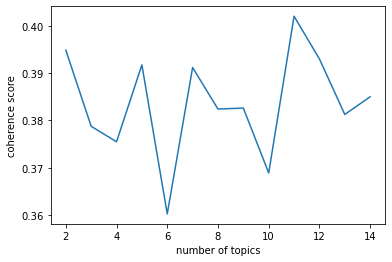

In [25]:
x=range(2,15)
plt.plot(x,coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

In [26]:
#가장 먼저 topic의 개수를 몇 개로 할 것인지 지정 

number=5

C:\Users\HSB\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
#지금까지 만든 데이터들을 통해 LDA 모델 구축

ldamodel=gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=number,
    alpha=0.1
)

C:\Users\HSB\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
ldamodel.show_topics(formatted=False)

C:\Users\HSB\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  [('설치', 0.049817313),
   ('싱크대', 0.016812038),
   ('기사', 0.015887614),
   ('인용', 0.0137491515),
   ('제품', 0.012327895),
   ('세척', 0.01176777),
   ('구매', 0.010474752),
   ('삼성', 0.009716388),
   ('설거지', 0.009434571),
   ('사용', 0.009247677)]),
 (1,
  [('설치', 0.017835306),
   ('세척', 0.016048005),
   ('인용', 0.013287729),
   ('싱크대', 0.0110832015),
   ('정말', 0.00808145),
   ('그릇', 0.008063981),
   ('주문', 0.007988326),
   ('정도', 0.0074145836),
   ('고민', 0.007255305),
   ('제품', 0.007090175)]),
 (2,
  [('설치', 0.027378112),
   ('사용', 0.019186331),
   ('기사', 0.013168594),
   ('세척', 0.013090866),
   ('주문', 0.0130536165),
   ('싱크대', 0.012850161),
   ('세기', 0.011730832),
   ('설거지', 0.009493113),
   ('생각', 0.009242409),
   ('구매', 0.008916215)]),
 (3,
  [('세척', 0.024002058),
   ('설치', 0.012861813),
   ('인용', 0.012708506),
   ('빌트', 0.0075618853),
   ('삼성', 0.0069702817),
   ('구매', 0.006906596),
   ('싱크대', 0.0068755867),
   ('정도', 0.0063733),
   ('건조', 0.005867882),
   ('소음', 0.005444574)]),
 (4

In [30]:
import pyLDAvis.gensim

vls=pyLDAvis.gensim.prepare(ldamodel,corpus,id2word)

#html 파일을 output으로 내서 저장할 수 있음
pyLDAvis.save_html(vls,'삼성리뷰(긍정).html')

C:\Users\HSB\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
